In [207]:
import numpy as np
import matplotlib.pyplot as plt
import random
import ipdb

## Synthetic Data: Parts (a) and (b)

(a) Using the python numpy.random package, sample 100 points in $\mathbb{R}^2$ from a normal distribution
centered at (0, 0) with standard deviation 0.3.

In [208]:
#TODO: PART A
mu = 0
sigma = 0.3

random1 = np.random.normal(loc=mu, scale=sigma, size=(100,2))

(b) Repeat the above with centers at (1, 1) and (−1, 1) and same standard deviation as above.
Collect all 300 points together into a list called X

In [209]:
#TODO: PART B

# synthetic data for center (1,1) and distribution 0.3
mu_x = 1
mu_y = 1
sigma = 0.3

random2 = np.random.normal(loc=mu, scale=sigma, size=(100,2))

# synthetic data for center (-1,1) and distribution 0.3
mu_x = -1
mu_y = 1
sigma = 0.3

random3 = np.random.normal(loc=mu, scale=sigma, size=(100,2))

# collect all 300 points in list x
X = np.concatenate((random1, random2, random3))

## Lloyd's Algorithm: Parts (c) and (d)

(c) Given a list of vectors data and a list of k centroids centroids, write a function group_assignment()
that assigns each vector to the centroid closest to it.

In [210]:
"""
The function below returns

grouping_vec_c: The grouping of each data point in data to single representative centroid.

This is a list of integers of the same length as data. Each element of the list contains the
index of the chosen centroid for the corresponding data point.
"""

def group_assignment(data,centroids):
    #TODO: PART C

    grouping_vec_c = [[0] * len(data[0]) for i in range(len(data))]
    for j in range(len(data)):
        min = float('inf')
        for i in range(len(centroids)):
            temp = np.linalg.norm(np.array(data[j]) - np.array(centroids[i]))
            if temp < min:
                min = temp
                grouping_vec_c[j] = i + 1

            

    return grouping_vec_c

In [211]:
def update_centroid(data, grouping, centroids):
    new_centroids = [];
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids

def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    
    
    J_obj = J_obj/len(data)
    return J_obj

(d) Using the provided functions update_centroid() and clustering_objective(), implement
the k-means algorithm which terminates when distance the chosen centroids at successive
iterations is less than $10^{−6}$.

In [212]:
"""
Runs LLoyd's algorithm until termination. Return the following

new_centroids: the centroids chosen at the end of the algorithm
grouping: the grouping of each of the data points
J_obj_vector: a record of the clustering objective at each iteration
iteration: total number of iterations run by the algorithm
"""

def Kmeans_alg(data, centroids):
    #TODO: PART D
    J_obj_vector = []
    iteration = 0

    while(1):
        iteration = iteration + 1
        grouping = group_assignment(data,centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objective(data, grouping, new_centroids)
        J_obj_vector.append(J_obj)

        if ((np.linalg.norm(np.array(new_centroids) - np.array(centroids))) < 10e-6):
            break

        centroids = new_centroids


    return new_centroids, grouping, J_obj_vector, iteration


## Run LLoyd's algorithm and visualize clusters

In [213]:
k = 3
num_points = len(X)
random_idxs = random.sample(range(num_points), k)
centroids = X[random_idxs]

In [214]:
new_centroids, grouping, J_obj_vector, iteration = Kmeans_alg(X, centroids)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_14144\3512376262.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grouping = np.array([np.int(e) for e in grouping])


Text(0.5, 1.0, 'Illustration of kmeans on synthetic data')

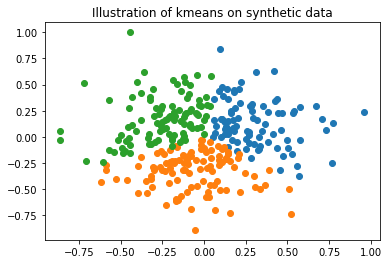

In [215]:
grouping = np.array([np.int(e) for e in grouping])
grps = [[X[i,:] for i in range(300) if grouping[i]==j] for j in range(1,4)]
plt.scatter([c[0] for c in grps[0]],[c[1] for c in grps[0]])
plt.scatter([c[0] for c in grps[1]],[c[1] for c in grps[1]])
plt.scatter([c[0] for c in grps[2]],[c[1] for c in grps[2]])

plt.title("Illustration of kmeans on synthetic data")

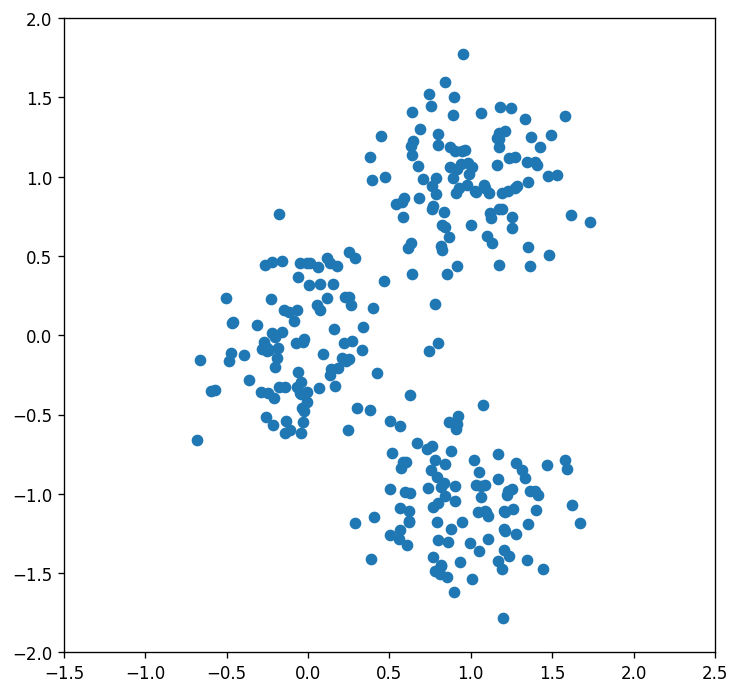

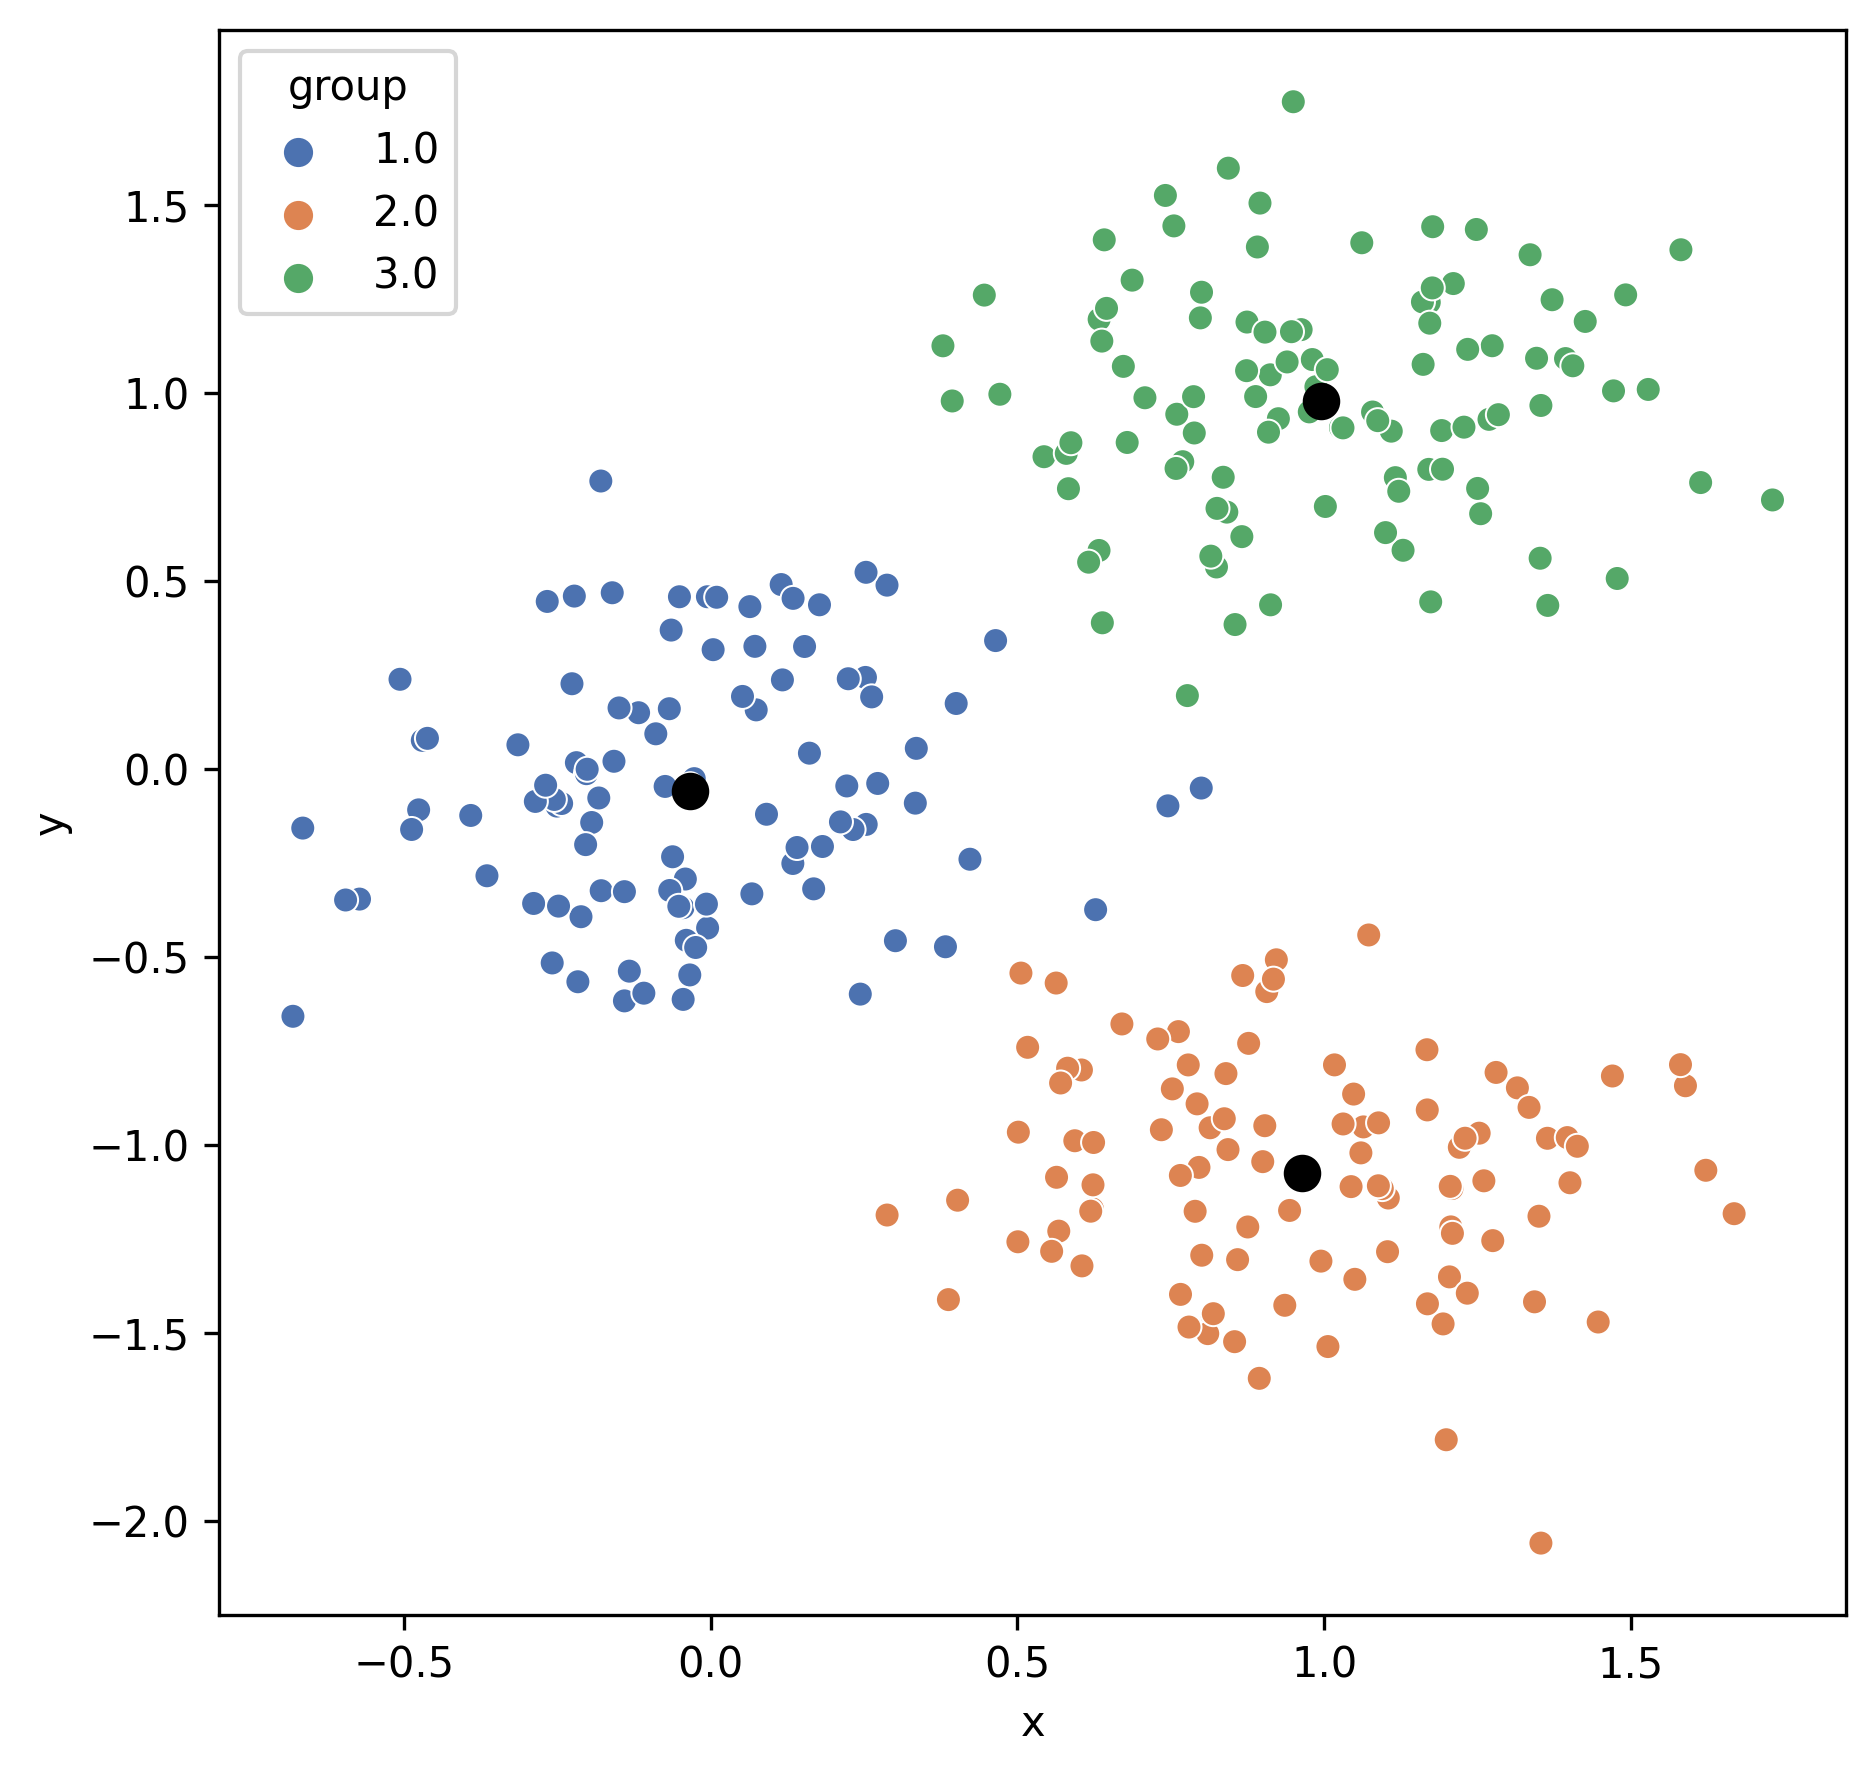

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def group_assignment(data,centroids):
    """
    Función de asignación de grupo:
    Aqui se asignan a los vectores mas cerca del grupo representativo
    como integrantes del grupo
    Se revisa toda la información para evaluar la distancia con respecto
    al punto representativo. Se toma la mínima, se asigna su centroide
    y así se forman todos los grupos
    """
    grouping_vec_c = np.zeros(len(data))
    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])
        min_dist = min(dist)
        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1
    return grouping_vec_c


def update_centroid(data, grouping, centroids):
    """
    Función de actualizacoón de centroide.
    El centoride es el punto que se asigna como el central representativo.
    Lo que hace la función es barrer toda la data, evaluando que esta
    pertenezca al grupo en cuestión. Después, para toda la data perteneciente
    al grupo, genera un nuevo universo y lo promedia.
    El valor promedio de dicho universo de datos será el nuevo
    centroide
    
    """
    new_centroids = [];
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids


def clustering_objective(data, grouping, centroids):
    """
    ESta función calcula las distancias entre los puntos
    referenciados en el centroide, para asi, porder hacer
    la clasificacion
    
    """
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj / len(data)
    return J_obj


def Kmeans_alg(data, centroids):
    """
    Aqui se realiza el ensable de todo el proceso
    """
    iteration = 0
    J_obj_vector = []
    Stop = False
    while Stop == False:
        grouping = group_assignment(data, centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objective(data, grouping,new_centroids)
        J_obj_vector.append(J_obj)
        iteration += 1
        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
            Stop = True
        else:
            centroids = new_centroids
    return new_centroids, grouping, J_obj_vector, iteration


def run():
    fig, ax = plt.subplots(1, 1, figsize = (7, 7),dpi = 120)
    X = np.concatenate([[0.3 * np.random.randn(2) for i in range(100)],\
                        [[1, 1] + 0.3 * np.random.randn(2) for i in range(100)], \
                        [[1, -1] + 0.3 * np.random.randn(2) for i in range(100)]])
    ax.scatter(X[:,0], X[:,1])
    ax.set_xlim(-1.5, 2.5)
    ax.set_ylim(-2, 2)
    plt.show()

    A = Kmeans_alg(X,X[:3])

    gruping = A[1].reshape(-1,1)
    arr = np.concatenate((X, gruping),axis=1)

    df = pd.DataFrame(arr,columns=['x', 'y', 'group'])

    fig,ax= plt.subplots(1,1,figsize=(7,7),dpi=300)
    sns.scatterplot(x='x',y='y',hue='group',data=df, palette='deep')
    for i in A[0]:
        ax.scatter(i[0],i[1],c='black',linewidths=3)
    plt.show()


run()